In [1]:
import cv2 as cv
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

def plot_img(img: np.ndarray) -> None:
    plt.figure(figsize=(20,6))
    plt.imshow(img)


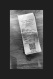

In [2]:
input_data = np.load('data/train_input.npy')
cv.imwrite('data/result.jpg', input_data[0])
Image(filename='data/result.jpg') 

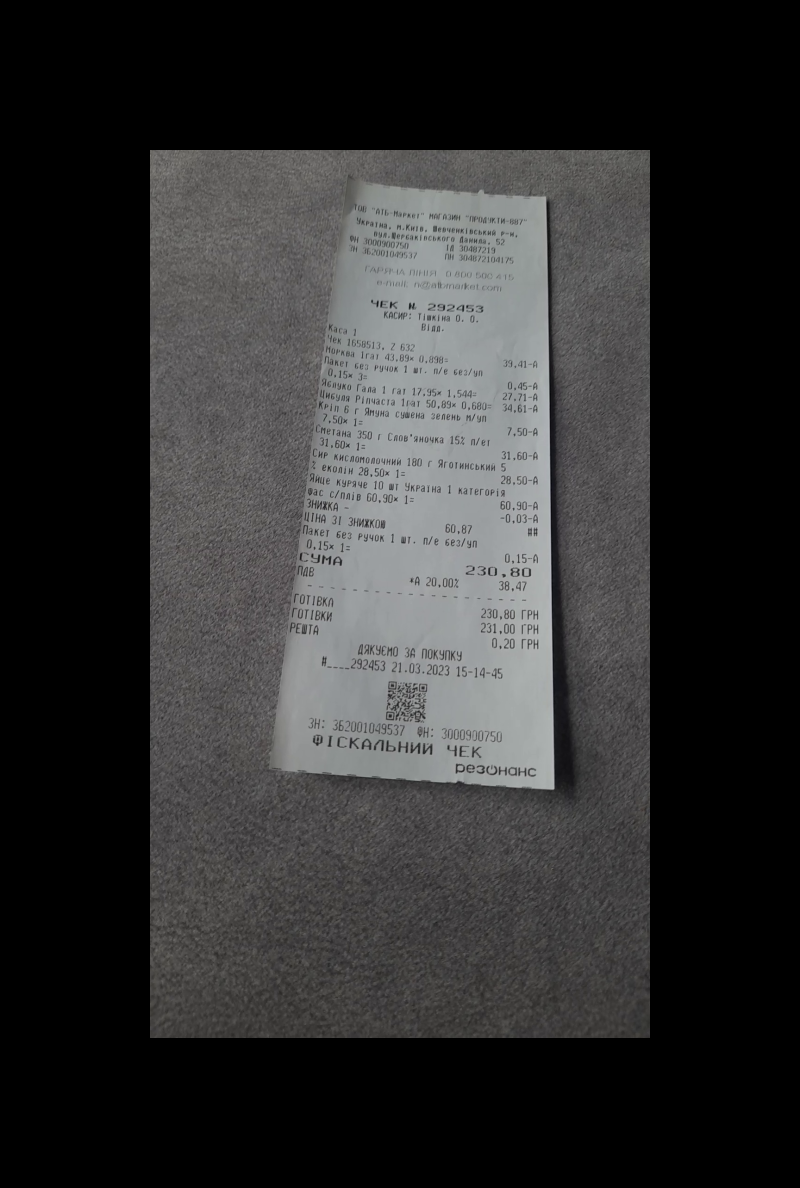

In [3]:
img_path = '/files_storage/36377ed9-c887-4616-9de8-9538ae935b3a.png'
img_path = '\\files_storage\\78c175f6-951c-42d8-b76e-c6df6f0c6a5d.png'
img_path = '\\files_storage\\d5d38473-b4de-4d53-8f6c-544bebab37f5.png'
Image(filename=img_path) 

In [4]:
img = cv.imread(img_path)

In [6]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray_img.shape

(1188, 800)

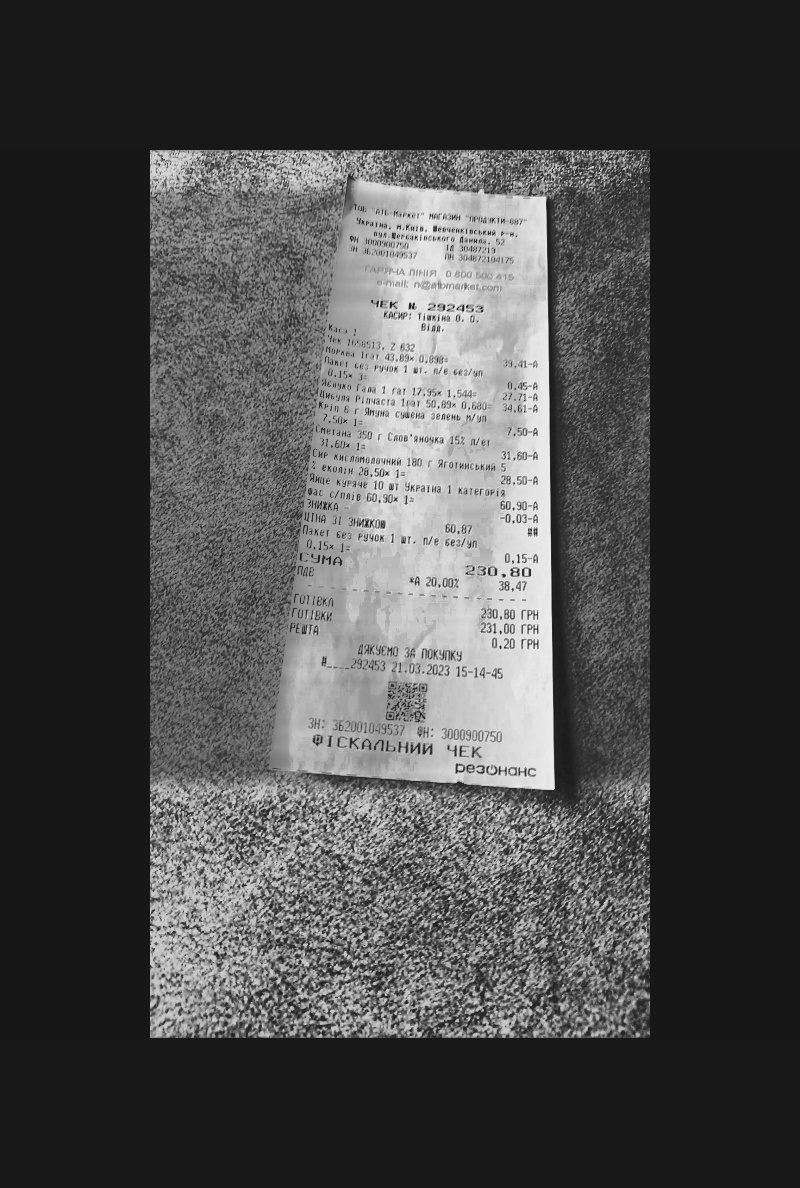

In [12]:
def transform_contrast(img: np.ndarray):
    # converting to LAB color space
    lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
    l_channel, a, b = cv.split(lab)

    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv.createCLAHE(clipLimit=20.0, tileGridSize=(1,200))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)

    # Stacking the original image with the enhanced image
    # img = np.hstack((img, enhanced_img))
    return img

def transform(img: np.ndarray) -> np.ndarray:
    # rgb_planes = cv.split(img)

    # result_planes = []
    # result_norm_planes = []
    # for plane in rgb_planes:
    #     dilated_img = cv.dilate(plane, np.ones((4,4), np.uint8))
    #     bg_img = cv.medianBlur(dilated_img, 21)
    #     diff_img = 255 - cv.absdiff(plane, bg_img)
    #     norm_img = cv.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
    #     # result_planes.append(diff_img)
    #     result_norm_planes.append(dilated_img)
    
    # # img = cv.merge(result_planes)
    # img = cv.merge(result_norm_planes)

    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # ksize = (5,5)
    # img = cv.blur(img, ksize) 
    # print(img.shape)
    return img

img = transform_contrast(img)
img = transform(img)
# img = transform(img)
cv.imwrite('data/result.jpg', img)
Image(filename='data/result.jpg') 